In [1]:
import pandas as pd
import numpy as np

In [2]:
# hide warning message
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('41419_2023_6395_MOESM3_ESM-modified_1.csv')

In [3]:
df.head()

,Catalog_No_1,Product_Name_1,MW,CAS_Number,Form,Targets,Information,SMILES,Max_Solubility_in_DMSO_mM,URL,Pathway,Relative_survival
0,S1001,ABT-263 (Navitoclax),974.61,923564-51-6,free base,Bcl-2,ABT-263 (Navitoclax) is a potent inhibitor of ...,C1=CC(=CC=C1C2=C(CC(CC2)(C)C)CN3CCN(CC3)C4=CC=...,102,http://www.selleckchem.com/products/ABT-263.html,Apoptosis,-44.108178
1,S1002,ABT-737,813.43,852808-04-9,free base,"Autophagy,Bcl-2","ABT-737 is a BH3 mimetic inhibitor of Bcl-xL, ...",C1=CC(=CC=C1C(=O)NS(C2=CC=C(C(=C2)[N+](=O)[O-]...,122,http://www.selleckchem.com/products/ABT-737.html,Apoptosis,-42.820348
2,S1003,Linifanib (ABT-869),375.41,796967-16-3,free base,"CSF-1R,PDGFR,VEGFR","Linifanib (ABT-869) is a novel, potent ATP-com...",C12=CC=CC(=C1C(=NN2)N)C3=CC=C(C=C3)NC(=O)NC4=C...,199,http://www.selleckchem.com/products/ABT-869.html,Protein Tyrosine Kinase,17.707663
3,S1004,Veliparib (ABT-888),244.29,912444-00-9,free base,PARP,Veliparib (ABT-888) is a potent inhibitor of P...,C1=CC=C2C(=C1C(N)=O)N=C(N2)[C@]3(NCCC3)C,69,http://www.selleckchem.com/products/ABT-888.html,DNA Damage,5.473278
4,S1005,Axitinib,386.47,319460-85-0,free base,"c-Kit,VEGFR,PDGFR",Axitinib is a multi-target inhibitor of VEGFR1...,C1(=CC=CC=C1C(=O)NC)SC2=CC3=C(C=C2)C(=NN3)/C=C...,108,http://www.selleckchem.com/products/Axitinib.html,Protein Tyrosine Kinase,-4.185448


In [4]:
y = df['Relative_survival']

In [5]:
from nltk.corpus import stopwords

In [6]:
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
import re

In [8]:
# build a stem_tokenizer function

def stem_tokenizer(text):
    stemmer = EnglishStemmer(ignore_stopwords=True)
    # EnglishStemmer is likely a class that performs stemming, which reduces words to their root form (e.g., "running" to "run").
    # ignore_stopwords=True: This option tells the stemmer to ignore stopwords (common words like "and," "the," etc.) during the stemming process.

    words = re.sub(r"[^A-Za-z0-9\-]", " ", text).lower().split()
    # This uses the re.sub function from the re (regular expression) module to substitute characters in text that are not letters (A-Za-z), numbers (0-9), or hyphens (-) with a space (" ")
    # Essentially, it removes any punctuation or special characters from the text, replacing them with spaces.
    # lower(): Converts the entire text to lowercase, ensuring uniformity for further processing.
    # split(): Splits the cleaned and lowercased text into a list of words based on spaces.

    words = [stemmer.stem(word) for word in words]
    # List comprehension: This line creates a new list by applying the stem method of the stemmer object to each word in the words list.
    # stemmer.stem(word): Stems each word, reducing it to its root form.
    # This produces a list of stemmed words.

    return words

In [9]:
# Initialize a vectorizer

cv = CountVectorizer(stop_words=stopwords.words('english'),
                     tokenizer=stem_tokenizer,
                     lowercase=True,
                     max_df=0.7,
                     min_df=1
                    )

In [146]:
# the input should be a list of text.
# 'Targets' and 'Information' features could have some important info, we will deal with them seperately.
# If there is any NaN values, you can choose to drop those rows or replace it with an empty string as a placeholder.
# Here I replace all 'NaN' values with an empty string.

texts = list(df['Information'].fillna(''))
texts_1 = list(df['Targets'].fillna(''))

In [11]:
cv.fit(texts)

CountVectorizer(max_df=0.7,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function stem_tokenizer at 0x00000184C148B880>)

In [76]:
cv.fit(texts_1)

CountVectorizer(max_df=0.7, ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function stem_tokenizer at 0x00000184C148B880>)

In [12]:
cv.vocabulary_

{'abt-263': 624,
 'navitoclax': 4110,
 'potent': 4818,
 'inhibitor': 3265,
 'bcl-xl': 1235,
 'bcl-2': 1231,
 'bcl-w': 1234,
 'ki': 3430,
 '0': 53,
 '5': 411,
 'nm': 4191,
 '1': 86,
 'bind': 1322,
 'weak': 6171,
 'mcl-1': 3751,
 'a1': 604,
 'phase': 4665,
 '2': 216,
 'abt-737': 626,
 'bh3': 1301,
 'mimet': 3885,
 'ec50': 2328,
 '78': 545,
 '7': 526,
 '30': 313,
 '3': 301,
 '197': 209,
 '8': 551,
 'respect': 5120,
 'inhibit': 3264,
 'observ': 4316,
 'bcl-b': 1233,
 'bfl-1': 1299,
 'linifanib': 3582,
 'abt-869': 628,
 'novel': 4261,
 'atp-competit': 1103,
 'vegfr': 6092,
 'pdgfr': 4573,
 'kdr': 3420,
 'csf-1r': 1913,
 'flt-1': 2648,
 'ic50': 3159,
 '4': 359,
 '66': 513,
 'effect': 2342,
 'mutant': 4047,
 'kinase-depend': 3444,
 'cancer': 1517,
 'cell': 1621,
 'e': 2312,
 'flt3': 2653,
 'veliparib': 6099,
 'abt-888': 629,
 'parp1': 4537,
 'parp2': 4538,
 '9': 580,
 'inact': 3225,
 'sirt2': 5424,
 'axitinib': 1138,
 'multi-target': 4031,
 'vegfr1': 6095,
 'vegfr2': 6097,
 'vegfr3': 6098,
 '

In [77]:
cv.vocabulary_

{'bcl-2': 82,
 'autophagi': 53,
 'autophagi bcl-2': 56,
 'csf-1r': 160,
 'pdgfr': 387,
 'vegfr': 529,
 'csf-1r pdgfr': 161,
 'pdgfr vegfr': 396,
 'csf-1r pdgfr vegfr': 162,
 'parp': 384,
 'c-kit': 103,
 'c-kit vegfr': 114,
 'vegfr pdgfr': 537,
 'c-kit vegfr pdgfr': 115,
 'src': 491,
 'bcr-abl': 84,
 'src bcr-abl': 492,
 'hif': 278,
 'mek': 341,
 'fgfr': 226,
 'pdgfr fgfr': 390,
 'vegfr pdgfr fgfr': 539,
 'egfr': 206,
 'her2': 274,
 'egfr her2': 207,
 'igf-1r': 299,
 'proteasom': 433,
 'flt3': 236,
 'fgfr flt3': 232,
 'flt3 c-kit': 237,
 'fgfr flt3 c-kit': 233,
 'flt3 c-kit vegfr': 238,
 'bcr-abl c-kit': 87,
 'c-kit src': 113,
 'bcr-abl c-kit src': 88,
 'mtor': 353,
 'autophagi egfr': 61,
 'c-kit bcr-abl': 104,
 'bcr-abl pdgfr': 90,
 'c-kit bcr-abl pdgfr': 105,
 'her2 egfr': 275,
 'tnf-alpha': 511,
 'hdac': 267,
 'pdgfr c-kit': 388,
 'vegfr pdgfr c-kit': 538,
 'pi3k': 405,
 'dna-pk': 179,
 'pi3k autophagi': 406,
 'autophagi dna-pk': 59,
 'dna-pk mtor': 180,
 'pi3k autophagi dna-pk': 407

In [13]:
len(cv.vocabulary_)

6291

In [78]:
len(cv.vocabulary_)

547

In [14]:
df_info = pd.DataFrame(cv.transform(texts).todense())

In [79]:
df_info_1 = pd.DataFrame(cv.transform(texts).todense())

In [15]:
df_info.columns = list(zip(*sorted(cv.vocabulary_.items(), key=lambda x: x[-1])))[0]

In [80]:
df_info_1.columns = list(zip(*sorted(cv.vocabulary_.items(), key=lambda x: x[-1])))[0]

In [16]:
df_info.head()

,-,-2,-activ,-adrenerg,-adrenoceptor,-amyloid,-approv,-atpas,-bicucullin,-blebbistatin,...,zolmitriptan,zomig,zonisamid,zoster,zosuquidar,zotarolimus,zoxazolamin,zstk474,zucc,zyloprim
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df_info_1.head()

,3,5-alpha,5-alpha reductas,5-ht,5-ht receptor,5-ht receptor adrenerg,5-ht receptor dopamin,acetyltransferas,achr,achr 5-ht,...,vegfr pdgfr,vegfr pdgfr c-kit,vegfr pdgfr fgfr,vegfr raf,wee1,wnt,wnt beta-catenin,x,x receptor,xa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_info.shape

(1902, 6291)

In [82]:
df_info_1.shape

(1902, 547)

In [90]:
# Add ngrams in the vectorizer

cv = CountVectorizer(stop_words=stopwords.words('english'),
                     tokenizer=stem_tokenizer,
                     lowercase=True,
                     max_df=0.7,
                     min_df=1,
                     ngram_range=(1, 3)
                    )

In [19]:
cv.fit(texts)

CountVectorizer(max_df=0.7, ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function stem_tokenizer at 0x00000184C148B880>)

In [91]:
cv.fit(texts_1)

CountVectorizer(max_df=0.7, ngram_range=(1, 3),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function stem_tokenizer at 0x00000184C148B880>)

In [20]:
cv.vocabulary_

{'abt-263': 4741,
 'navitoclax': 25711,
 'potent': 29987,
 'inhibitor': 20613,
 'bcl-xl': 8916,
 'bcl-2': 8889,
 'bcl-w': 8909,
 'ki': 22253,
 '0': 205,
 '5': 3209,
 'nm': 26047,
 '1': 653,
 'bind': 9237,
 'weak': 38755,
 'mcl-1': 23912,
 'a1': 4620,
 'phase': 29100,
 '2': 1656,
 'abt-263 navitoclax': 4742,
 'navitoclax potent': 25712,
 'potent inhibitor': 30188,
 'inhibitor bcl-xl': 20691,
 'bcl-xl bcl-2': 8917,
 'bcl-2 bcl-w': 8892,
 'bcl-w ki': 8914,
 'ki 0': 22254,
 '0 5': 418,
 '5 nm': 3304,
 'nm 1': 26077,
 '1 nm': 791,
 'nm bind': 26524,
 'bind weak': 9345,
 'weak mcl-1': 38775,
 'mcl-1 a1': 23913,
 'a1 phase': 4621,
 'phase 1': 29101,
 '1 2': 683,
 'abt-263 navitoclax potent': 4743,
 'navitoclax potent inhibitor': 25713,
 'potent inhibitor bcl-xl': 30192,
 'inhibitor bcl-xl bcl-2': 20692,
 'bcl-xl bcl-2 bcl-w': 8919,
 'bcl-2 bcl-w ki': 8894,
 'bcl-w ki 0': 8915,
 'ki 0 5': 22275,
 '0 5 nm': 423,
 '5 nm 1': 3306,
 'nm 1 nm': 26087,
 '1 nm 1': 793,
 '1 nm bind': 815,
 'nm bind we

In [85]:
cv.vocabulary_

{'bcl-2': 82,
 'autophagi': 53,
 'autophagi bcl-2': 56,
 'csf-1r': 160,
 'pdgfr': 387,
 'vegfr': 529,
 'csf-1r pdgfr': 161,
 'pdgfr vegfr': 396,
 'csf-1r pdgfr vegfr': 162,
 'parp': 384,
 'c-kit': 103,
 'c-kit vegfr': 114,
 'vegfr pdgfr': 537,
 'c-kit vegfr pdgfr': 115,
 'src': 491,
 'bcr-abl': 84,
 'src bcr-abl': 492,
 'hif': 278,
 'mek': 341,
 'fgfr': 226,
 'pdgfr fgfr': 390,
 'vegfr pdgfr fgfr': 539,
 'egfr': 206,
 'her2': 274,
 'egfr her2': 207,
 'igf-1r': 299,
 'proteasom': 433,
 'flt3': 236,
 'fgfr flt3': 232,
 'flt3 c-kit': 237,
 'fgfr flt3 c-kit': 233,
 'flt3 c-kit vegfr': 238,
 'bcr-abl c-kit': 87,
 'c-kit src': 113,
 'bcr-abl c-kit src': 88,
 'mtor': 353,
 'autophagi egfr': 61,
 'c-kit bcr-abl': 104,
 'bcr-abl pdgfr': 90,
 'c-kit bcr-abl pdgfr': 105,
 'her2 egfr': 275,
 'tnf-alpha': 511,
 'hdac': 267,
 'pdgfr c-kit': 388,
 'vegfr pdgfr c-kit': 538,
 'pi3k': 405,
 'dna-pk': 179,
 'pi3k autophagi': 406,
 'autophagi dna-pk': 59,
 'dna-pk mtor': 180,
 'pi3k autophagi dna-pk': 407

In [21]:
df_info_ngram = pd.DataFrame(cv.transform(texts).todense())

In [92]:
df_info_ngram_1 = pd.DataFrame(cv.transform(texts_1).todense())

In [22]:
df_info_ngram.columns = list(zip(*sorted(cv.vocabulary_.items(), key=lambda x: x[-1])))[0]

In [93]:
df_info_ngram_1.columns = list(zip(*sorted(cv.vocabulary_.items(), key=lambda x: x[-1])))[0]

In [88]:
df_info_ngram.head()

,-,- -blebbistatin,- -blebbistatin cell-perm,- -enantiom,- -enantiom nutlin-3a,- -epigallocatechin,- -epigallocatechin gallat,- -mediat,- -mediat nf,- -p-bromotetramisol,...,zoxazolamin,zoxazolamin central,zoxazolamin central act,zstk474,zstk474 inhibit,zstk474 inhibit class,zucc,zyloprim,zyloprim xanthin,zyloprim xanthin oxidas
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df_info_ngram_1.head()

,3,5-alpha,5-alpha reductas,5-ht,5-ht receptor,5-ht receptor adrenerg,5-ht receptor dopamin,acetyltransferas,achr,achr 5-ht,...,vegfr pdgfr,vegfr pdgfr c-kit,vegfr pdgfr fgfr,vegfr raf,wee1,wnt,wnt beta-catenin,x,x receptor,xa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer: This is a tool from scikit-learn that transforms text data into a matrix of TF-IDF features. TF-IDF stands for Term Frequency-Inverse Document Frequency, which is a statistical measure used to evaluate the importance of a word in a collection of documents.

In [96]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'))
# stop_words=stopwords.words('english'): This parameter specifies that English stop words (commonly used words that may not carry significant meaning, such as "and," "the," etc.) should be ignored during the transformation. The stopwords.words('english') function from the nltk library returns a list of common English stop words.

In [26]:
tfidf.fit(texts)
# fit(texts): This method is used to learn the vocabulary from the provided list of documents (texts). It computes the TF-IDF scores for all words in the texts, essentially preparing the vectorizer for transformation.

TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [97]:
tfidf.fit(texts_1)

TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [27]:
df_tfidf = pd.DataFrame(tfidf.transform(texts).todense())
# tfidf.transform(texts): This method transforms the texts into a sparse matrix of TF-IDF features, where each row corresponds to a document and each column corresponds to a word's TF-IDF score in that document.
# .todense(): Converts the sparse matrix into a dense matrix, which is a more traditional 2D array format.
# pd.DataFrame(...): Converts the dense matrix into a Pandas DataFrame, which is a tabular data structure with labeled axes (rows and columns). This makes it easier to manipulate and analyze the data.

In [99]:
df_tfidf_1 = pd.DataFrame(tfidf.transform(texts_1).todense())

In [28]:
df_tfidf.columns = list(zip(*sorted(tfidf.vocabulary_.items(), key=lambda x: x[-1])))[0]

In [102]:
df_tfidf_1.columns = list(zip(*sorted(tfidf.vocabulary_.items(), key=lambda x: x[-1])))[0]

In [101]:
df_tfidf.head()

,00,000,001,00562271,0063794,0068,01,01027,01367338,014699,...,β1,β2,β3,β5,βi,βii,δn3,κb,μg,μm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
df_tfidf_1.head()

,1r,abl,acetyltransferase,achr,activating,adrenergic,akt,alk,alpha,ampa,...,transferase,trk,trpv,vasopressin,vda,vegfr,wee1,wnt,xa,κb
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.510536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.413635,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.527692,0.0,0.0,0.0,0.0


In [30]:
X = df_tfidf

In [104]:
X_1 = df_tfidf_1

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pylab as plt
%matplotlib inline

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y, test_size=0.3, random_state=42)

In [33]:
X_train.shape

(1331, 6407)

In [106]:
X_train_1.shape

(1331, 222)

In [107]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [108]:
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)

LinearRegression()

Text(0, 0.5, 'y_train_pred')

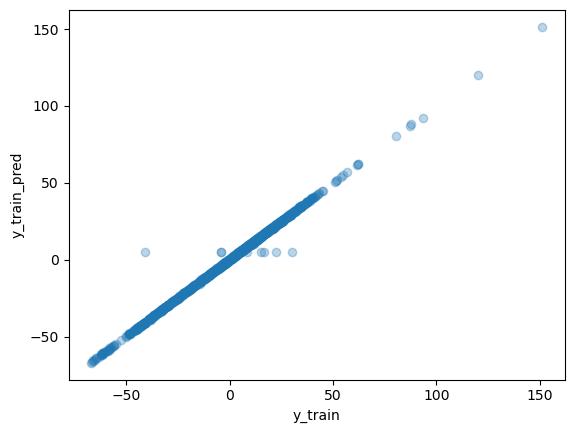

In [36]:
y_train_pred = model.predict(X_train)
plt.scatter(y_train, y_train_pred, alpha = 0.3)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

Text(0, 0.5, 'y_train_pred_1')

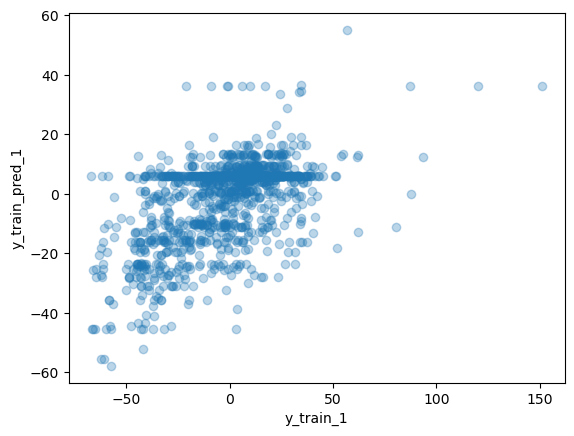

In [109]:
y_train_pred_1 = model_1.predict(X_train_1)
plt.scatter(y_train_1, y_train_pred_1, alpha = 0.3)
plt.xlabel('y_train_1')
plt.ylabel('y_train_pred_1')

In [37]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

test MAE: 2.91e-01
test MSE: 2.66e+00
test R2: 0.996


In [110]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_train_1, y_train_pred_1)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_train_1, y_train_pred_1)))
print('test R2: {0:.3f}'.format(r2_score(y_train_1, y_train_pred_1)))

test MAE: 1.51e+01
test MSE: 4.06e+02
test R2: 0.318


Text(0, 0.5, 'y_test_pred')

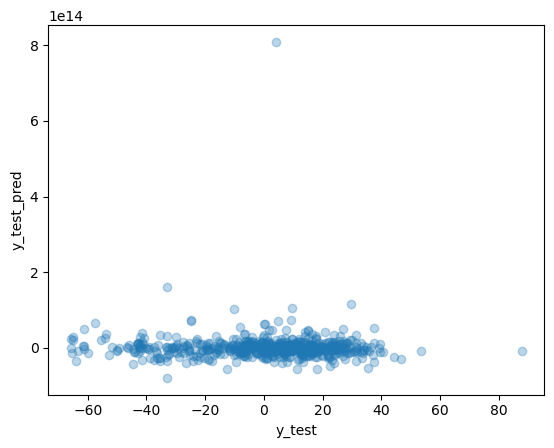

In [38]:
y_test_pred = model.predict(X_test)
plt.scatter(y_test, y_test_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

Text(0, 0.5, 'y_test_pred_1')

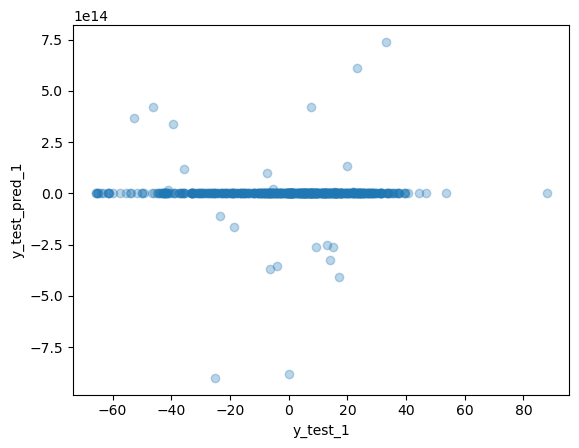

In [111]:
y_test_pred_1 = model_1.predict(X_test_1)
plt.scatter(y_test_1, y_test_pred_1, alpha = 0.3)
plt.xlabel('y_test_1')
plt.ylabel('y_test_pred_1')

In [39]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.59e+13
test MSE: 1.61e+27
test R2: -2937403447214969242779648.000


In [112]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test_1, y_test_pred_1)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test_1, y_test_pred_1)))
print('test R2: {0:.3f}'.format(r2_score(y_test_1, y_test_pred_1)))

test MAE: 1.33e+13
test MSE: 6.89e+27
test R2: -12563489573753478122045440.000


In [113]:
from sklearn.linear_model import Lasso

In [121]:
lasso = Lasso(alpha = 1)

In [119]:
lasso = lasso.fit(X_train, y_train)

In [122]:
lasso_1 = lasso.fit(X_train_1, y_train_1)

Text(0, 0.5, 'y_train_pred')

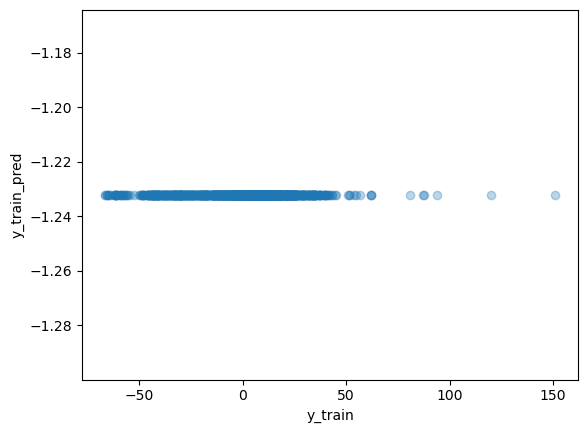

In [120]:
y_train_pred = lasso.predict(X_train)
plt.scatter(y_train, y_train_pred, alpha = 0.3)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

Text(0, 0.5, 'y_train_pred_1')

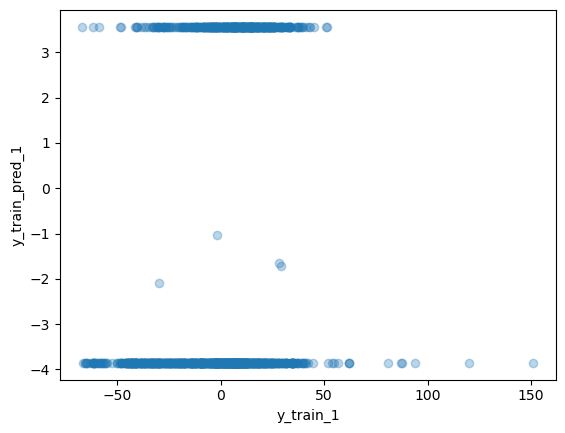

In [123]:
y_train_pred_1 = lasso_1.predict(X_train_1)
plt.scatter(y_train_1, y_train_pred_1, alpha = 0.3)
plt.xlabel('y_train_1')
plt.ylabel('y_train_pred_1')

In [49]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

test MAE: 1.90e+01
test MSE: 5.95e+02
test R2: 0.000


In [124]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_train_1, y_train_pred_1)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_train_1, y_train_pred_1)))
print('test R2: {0:.3f}'.format(r2_score(y_train_1, y_train_pred_1)))

test MAE: 1.85e+01
test MSE: 5.68e+02
test R2: 0.046


Text(0, 0.5, 'y_test_pred')

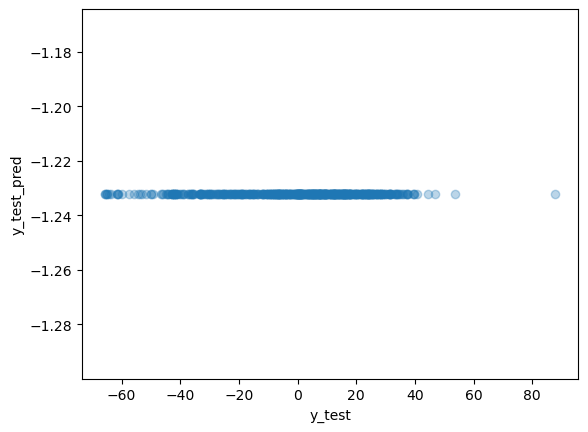

In [50]:
y_test_pred = lasso.predict(X_test)
plt.scatter(y_test, y_test_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

Text(0, 0.5, 'y_test_pred_1')

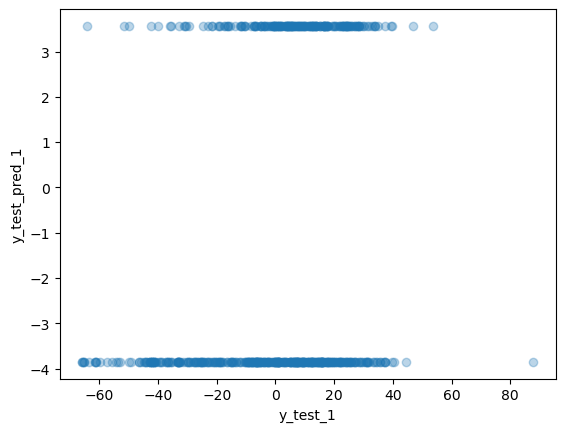

In [125]:
y_test_pred_1 = lasso_1.predict(X_test_1)
plt.scatter(y_test_1, y_test_pred_1, alpha = 0.3)
plt.xlabel('y_test_1')
plt.ylabel('y_test_pred_1')

In [51]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.86e+01
test MSE: 5.50e+02
test R2: -0.002


In [126]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test_1, y_test_pred_1)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test_1, y_test_pred_1)))
print('test R2: {0:.3f}'.format(r2_score(y_test_1, y_test_pred_1)))

test MAE: 1.81e+01
test MSE: 5.25e+02
test R2: 0.044


In [127]:
alpha_list = [0.1, 0.5, 1, 10, 20, 100] 
# start by trying [0.1, 0.5, 1, 10, 20, 100],and narrow down to a range for more granular comparison. 

In [53]:
MAE_train = []
MAE_test = []
for alpha in alpha_list:
    lasso = Lasso(alpha)
    lasso = lasso.fit(X_train, y_train)
    y_train_pred_alpha = lasso.predict(X_train)
    MAE_train.append(mean_absolute_error(y_train, y_train_pred_alpha))
    y_test_pred_alpha = lasso.predict(X_test)
    MAE_test.append(mean_absolute_error(y_test, y_test_pred_alpha))

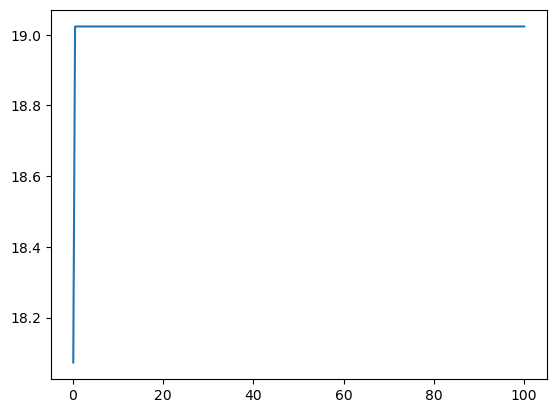

In [54]:
plt.plot(alpha_list, MAE_train)

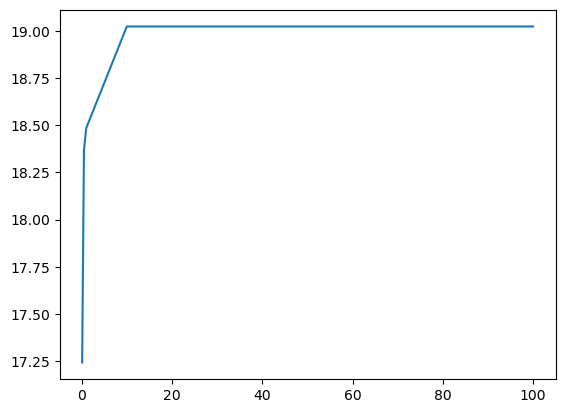

In [128]:
MAE_train_1 = []
MAE_test_1 = []
for alpha in alpha_list:
    lasso_1 = Lasso(alpha)
    lasso_1 = lasso_1.fit(X_train_1, y_train_1)
    y_train_pred_alpha_1 = lasso_1.predict(X_train_1)
    MAE_train_1.append(mean_absolute_error(y_train_1, y_train_pred_alpha_1))
    y_test_pred_alpha_1 = lasso_1.predict(X_test_1)
    MAE_test_1.append(mean_absolute_error(y_test_1, y_test_pred_alpha_1))

plt.plot(alpha_list, MAE_train_1)

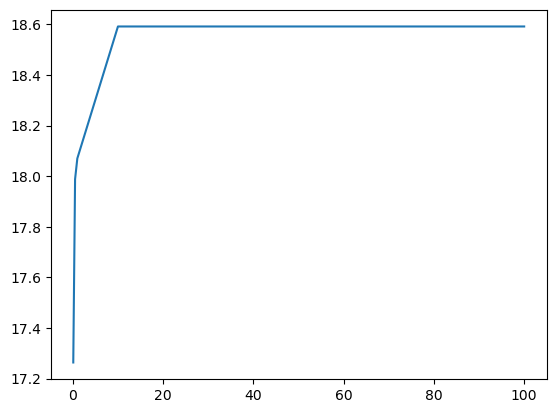

In [129]:
plt.plot(alpha_list, MAE_test_1)

In [130]:
alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

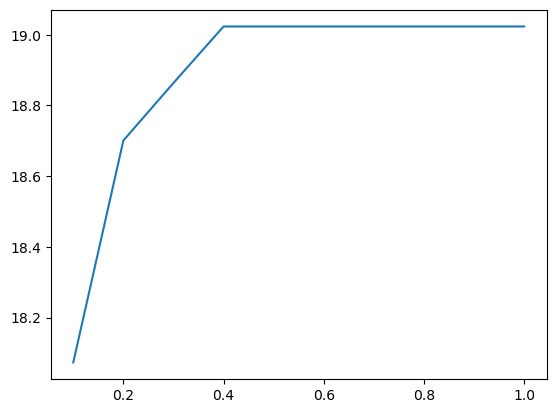

In [56]:
MAE_train = []
MAE_test = []
for alpha in alpha_list:
    lasso = Lasso(alpha)
    lasso = lasso.fit(X_train, y_train)
    y_train_pred_alpha = lasso.predict(X_train)
    MAE_train.append(mean_absolute_error(y_train, y_train_pred_alpha))
    y_test_pred_alpha = lasso.predict(X_test)
    MAE_test.append(mean_absolute_error(y_test, y_test_pred_alpha))
plt.plot(alpha_list, MAE_train)

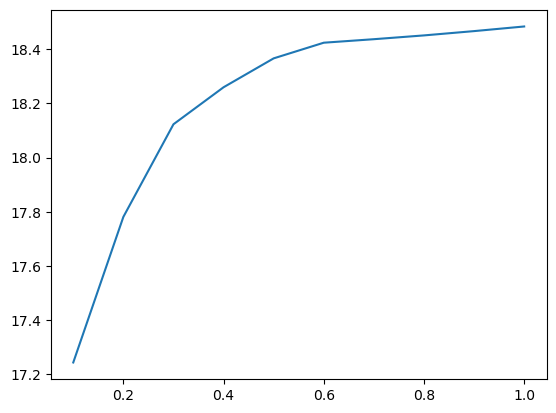

In [131]:
MAE_train_1 = []
MAE_test_1 = []
for alpha in alpha_list:
    lasso_1 = Lasso(alpha)
    lasso_1 = lasso_1.fit(X_train_1, y_train_1)
    y_train_pred_alpha_1 = lasso_1.predict(X_train_1)
    MAE_train_1.append(mean_absolute_error(y_train_1, y_train_pred_alpha_1))
    y_test_pred_alpha_1 = lasso_1.predict(X_test_1)
    MAE_test_1.append(mean_absolute_error(y_test_1, y_test_pred_alpha_1))

plt.plot(alpha_list, MAE_train_1)

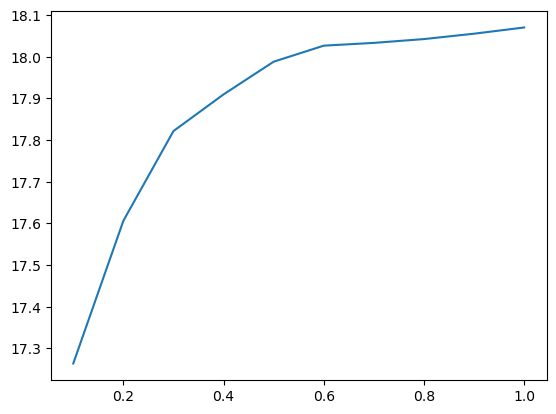

In [132]:
plt.plot(alpha_list, MAE_test_1)

In [57]:
lasso = Lasso(0.05)
lasso = lasso.fit(X_train, y_train)
y_train_pred_alpha = lasso.predict(X_train)
y_test_pred_alpha = lasso.predict(X_test)

In [133]:
lasso_1 = Lasso(0.05)
lasso_1 = lasso_1.fit(X_train_1, y_train_1)
y_train_pred_alpha_1 = lasso_1.predict(X_train_1)
y_test_pred_alpha_1 = lasso_1.predict(X_test_1)

In [58]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred_alpha)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred_alpha)))
print('test R2: {0:.3f}'.format(r2_score(y_train, y_train_pred_alpha)))

test MAE: 1.73e+01
test MSE: 5.09e+02
test R2: 0.145


In [134]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_train_1, y_train_pred_alpha_1)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_train_1, y_train_pred_alpha_1)))
print('test R2: {0:.3f}'.format(r2_score(y_train_1, y_train_pred_alpha_1)))

test MAE: 1.66e+01
test MSE: 4.63e+02
test R2: 0.223


In [59]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred_alpha)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred_alpha)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred_alpha)))

test MAE: 1.69e+01
test MSE: 4.67e+02
test R2: 0.149


In [135]:
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test_1, y_test_pred_alpha_1)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test_1, y_test_pred_alpha_1)))
print('test R2: {0:.3f}'.format(r2_score(y_test_1, y_test_pred_alpha_1)))

test MAE: 1.70e+01
test MSE: 4.70e+02
test R2: 0.144


Text(0, 0.5, 'y_test_pred_alpha')

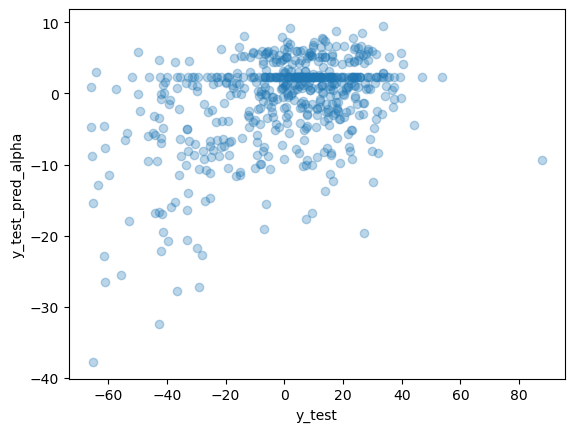

In [60]:
plt.scatter(y_test, y_test_pred_alpha, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred_alpha')

Text(0, 0.5, 'y_test_pred_alpha_1')

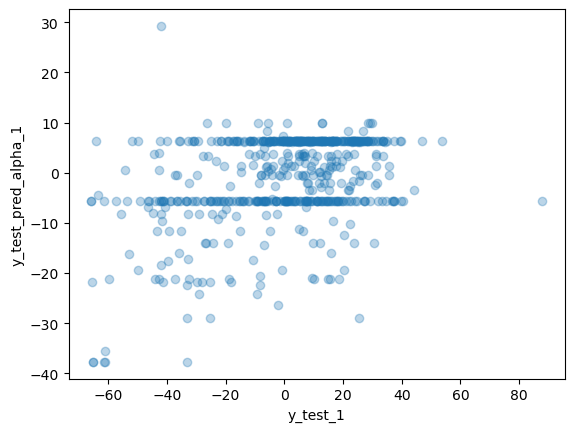

In [136]:
plt.scatter(y_test_1, y_test_pred_alpha_1, alpha = 0.3)
plt.xlabel('y_test_1')
plt.ylabel('y_test_pred_alpha_1')

In [74]:
tfidf.vocabulary_

{'abt': 639,
 '263': 259,
 'navitoclax': 4183,
 'potent': 4850,
 'inhibitor': 3338,
 'bcl': 1255,
 'xl': 6324,
 'ki': 3521,
 'nm': 4269,
 'binds': 1339,
 'weakly': 6276,
 'mcl': 3832,
 'a1': 621,
 'phase': 4677,
 '737': 518,
 'bh3': 1316,
 'mimetic': 3979,
 'ec50': 2347,
 '78': 540,
 '30': 293,
 '197': 192,
 'respectively': 5198,
 'inhibition': 3337,
 'observed': 4354,
 'bfl': 1313,
 'linifanib': 3662,
 '869': 573,
 'novel': 4310,
 'atp': 1130,
 'competitive': 1822,
 'vegfr': 6213,
 'pdgfr': 4601,
 'kdr': 3510,
 'csf': 1913,
 '1r': 199,
 'flt': 2685,
 'pdgfrβ': 4603,
 'ic50': 3220,
 '66': 478,
 'mostly': 4071,
 'effective': 2363,
 'mutant': 4119,
 'kinase': 3533,
 'dependent': 2095,
 'cancer': 1506,
 'cells': 1618,
 'flt3': 2688,
 'veliparib': 6217,
 '888': 581,
 'parp1': 4566,
 'parp2': 4567,
 'inactive': 3284,
 'sirt2': 5518,
 'axitinib': 1161,
 'multi': 4105,
 'target': 5790,
 'vegfr1': 6214,
 'vegfr2': 6215,
 'vegfr3': 6216,
 'kit': 3543,
 'saracatinib': 5369,
 'azd0530': 1178,
 's

In [137]:
tfidf.vocabulary_

{'bcl': 27,
 'autophagy': 25,
 'csf': 53,
 '1r': 0,
 'pdgfr': 156,
 'vegfr': 217,
 'parp': 154,
 'kit': 121,
 'src': 200,
 'bcr': 28,
 'abl': 1,
 'hif': 98,
 'mek': 130,
 'fgfr': 82,
 'egfr': 70,
 'her2': 97,
 'igf': 110,
 'proteasome': 174,
 'flt3': 83,
 'mtor': 138,
 'tnf': 209,
 'alpha': 8,
 'hdac': 95,
 'pi3k': 162,
 'dna': 61,
 'pk': 164,
 'raf': 180,
 'others': 145,
 'aurora': 24,
 'kinase': 119,
 'rock': 190,
 'hsp': 103,
 'hsp90': 104,
 'pkc': 166,
 'e3': 69,
 'ligase': 122,
 'mdm2': 129,
 'tgf': 207,
 'beta': 30,
 'smad': 197,
 'met': 131,
 'alk': 7,
 'gsk': 93,
 'p38': 148,
 'mapk': 127,
 'akt': 6,
 'hedgehog': 96,
 'smoothened': 198,
 'atm': 21,
 'atr': 23,
 'pdk': 158,
 'ret': 185,
 'plk': 168,
 'phospholipase': 160,
 'pla': 167,
 'cathepsin': 41,
 'cdk': 44,
 'tie': 208,
 'axl': 26,
 'trk': 213,
 'receptor': 183,
 'sirtuin': 196,
 'survivin': 203,
 'jak': 116,
 'opioid': 144,
 'androgen': 12,
 'cftr': 46,
 'microtubule': 133,
 'associated': 19,
 'stat': 201,
 'rna': 189,
 

In [138]:
grams_1 = [''] * len(tfidf.vocabulary_)
for k, v in tfidf.vocabulary_.items():
    grams_1[v] = k

gram_weight_1 = list(zip(grams_1, lasso_1.coef_))
gram_weight_1.sort(key=lambda x: x[1])

In [145]:
gram_weight_1[:25]

[('alk', -30.010801208617636),
 ('hsp90', -26.959251414455775),
 ('mtor', -23.255700682727955),
 ('akt', -20.81529141294246),
 ('hsp', -18.506042629712162),
 ('stat', -16.77539081610168),
 ('egfr', -16.067833565676832),
 ('proteasome', -15.511416971778752),
 ('hdac', -15.487027387867482),
 ('dub', -13.704597634834291),
 ('topoisomerase', -8.409126060113463),
 ('src', -7.347497226525218),
 ('cdk', -6.736205526103684),
 ('jak', -6.019829148069549),
 ('fgfr', -5.897312562879983),
 ('flt3', -5.788214162105564),
 ('igf', -5.559016057824156),
 ('opioid', -4.794002186624809),
 ('autophagy', -2.603071820162742),
 ('e2', -2.547829415911088),
 ('pi3k', -2.511750327648388),
 ('bcl', -1.1400533632081888),
 ('1r', -0.0),
 ('abl', -0.0),
 ('acetyltransferase', 0.0)]

In [142]:
gram_weight_1[-20:]

[('wnt', 0.0),
 ('xa', 0.0),
 ('κb', -0.0),
 ('adrenergic', 3.2923870413540124),
 ('protease', 3.3913550429323402),
 ('cyp17', 3.53947729385821),
 ('p450', 4.504728339772366),
 ('histone', 5.086801786467123),
 ('raas', 5.108097310139278),
 ('p38', 5.515655374414927),
 ('beta', 6.809330032328172),
 ('achr', 6.991298738716451),
 ('channel', 8.096541114201374),
 ('mapk', 8.096846356127479),
 ('histamine', 8.177246700968617),
 ('cox', 9.269282377649402),
 ('others', 11.88389409450599),
 ('pde', 13.979765104563718),
 ('receptor', 16.267766800293902),
 ('gsk', 34.88874397772769)]

In [62]:
grams = [''] * len(tfidf.vocabulary_)
for k, v in tfidf.vocabulary_.items():
    grams[v] = k

In [66]:
len(grams)

6407

In [67]:
gram_weight = list(zip(grams, lasso.coef_))
gram_weight.sort(key=lambda x: x[1])

In [73]:
gram_weight[:50]

[('phase', -49.43869521187065),
 ('hsp90', -47.64213491426686),
 ('novel', -44.631545383201725),
 ('egfr', -30.969192011824177),
 ('mtor', -30.94100127764466),
 ('proteasome', -27.511655267502434),
 ('hdac', -26.241000456016053),
 ('dna', -24.797579869506354),
 ('nm', -20.523789985695025),
 ('cells', -19.330685564534292),
 ('stat3', -14.934938079214518),
 ('igf', -13.076152364803036),
 ('inhibitor', -12.545480002587214),
 ('potent', -11.726522214993402),
 ('bcl', -7.073254348617224),
 ('activity', -6.913796960055962),
 ('ikk', -0.6488242044324161),
 ('00', -0.0),
 ('000', 0.0),
 ('001', -0.0),
 ('00562271', -0.0),
 ('0063794', -0.0),
 ('0068', -0.0),
 ('01', -0.0),
 ('01027', 0.0),
 ('01367338', 0.0),
 ('014699', 0.0),
 ('0152', 0.0),
 ('016', -0.0),
 ('017', 0.0),
 ('019', -0.0),
 ('01910', 0.0),
 ('0199', -0.0),
 ('02', -0.0),
 ('02067', -0.0),
 ('023', -0.0),
 ('024', -0.0),
 ('027', -0.0),
 ('028', 0.0),
 ('03', 0.0),
 ('030031', -0.0),
 ('03012', -0.0),
 ('032', -0.0),
 ('033', -0

In [72]:
gram_weight[-50:]

[('zd6474', -0.0),
 ('zebularine', 0.0),
 ('zetia', 0.0),
 ('zibotentan', 0.0),
 ('zidovudine', 0.0),
 ('zileuton', 0.0),
 ('zinc', -0.0),
 ('zingiberaceae', 0.0),
 ('ziprasidone', 0.0),
 ('zln005', 0.0),
 ('zm', -0.0),
 ('zmp', 0.0),
 ('zolmitriptan', 0.0),
 ('zomig', 0.0),
 ('zonisamide', 0.0),
 ('zoster', 0.0),
 ('zosuquidar', 0.0),
 ('zotarolimus', -0.0),
 ('zoxazolamine', 0.0),
 ('zstk474', 0.0),
 ('zucc', -0.0),
 ('zyloprim', -0.0),
 ('µm', 0.0),
 ('α1', 0.0),
 ('α1d', 0.0),
 ('α2', -0.0),
 ('α2a', 0.0),
 ('α2b', 0.0),
 ('α2c', 0.0),
 ('α3', -0.0),
 ('α4β2', -0.0),
 ('α7', 0.0),
 ('αvβ3', 0.0),
 ('αvβ5', 0.0),
 ('β1', -0.0),
 ('β2', 0.0),
 ('β3', 0.0),
 ('β5', -0.0),
 ('βi', -0.0),
 ('βii', -0.0),
 ('δn3', -0.0),
 ('κb', -0.0),
 ('μg', -0.0),
 ('μm', -0.0),
 ('14', 1.1299591766890325),
 ('anti', 3.8537100490841207),
 ('cdk5', 6.421466575105172),
 ('inflammatory', 10.854749928379166),
 ('receptor', 16.377142269399783),
 ('used', 19.74839745687738)]

### The most important tokens could be "used", "receptor", "inflammatory", "cdk5" and "anti", which are closely related with survival rates